# Data Analysis Project: E-Commerce Public

- Name: Sri Hartina Djamaluddin
- Email: srihartinadj@gmail.com
- Dicoding Id: tinashdj

# A. Business Questions

1. Produk apa yang memiliki total pesanan terbanyak?
2. Kota mana yang banyak melakukan pemesanan produk?
3. Bagaimana performa total pemesanan produk per bulan?
4. Bagaimana performa pendapatan per bulan?
5. Bagaimana distribusi pelanggan berdasarkan recency, frequency dan monetary?

# B. Preparing Libraries

Untuk melakukan proyek analisis data e-commerce publik, kita perlu memanggil semua library yang akan digunakan dalam proses analisis.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# C. Data Wrangling

Data wrangling merupakan sebuah proses atau kumpulan kegiatan yang meliputi pengumpulan data (Gathering data), penilaian data (Assessing data), serta pembersihan data (Cleaning data) sebelum data digunakan dalam proses analisis data.

## 1. Gathering Data

Tahap pertama dimulai dengan proses pengumpulan data. Pada proses ini kita akan mengumpulkan semua data yang dibutuhkan untuk analisis sehingga mampu menjawab pertanyaan atau masalah bisnis yang akan diselesaikan. Data yang kita gunakan adalah data customers, orders, order items dan products.

In [2]:
customers = pd.read_csv('customers_dataset.csv')
orders = pd.read_csv('orders_dataset.csv')
order_items = pd.read_csv('order_items_dataset.csv')
products = pd.read_csv('products_dataset.csv')

#### Menggabungkan Data

Untuk memudahkan analisis data kita akan menggabungkan data yang akan digunakan menjadi satu dataset dengan perintah "merge".

In [3]:
orders_df = pd.merge(orders, order_items, how='inner', on='order_id')
products_df = pd.merge(orders_df, products, how='inner', on='product_id')
ecommerce = pd.merge(products_df, customers, how='inner', on='customer_id')

ecommerce

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,268.0,4.0,500.0,19.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,1,87285b34884572647811a353c7ac498a,...,268.0,4.0,500.0,19.0,8.0,13.0,3a51803cc0d012c3b5dc8b7528cb05f7,3366,sao paulo,SP
2,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,1,87285b34884572647811a353c7ac498a,...,268.0,4.0,500.0,19.0,8.0,13.0,ef0996a1a279c26e7ecbd737be23d235,2290,sao paulo,SP
3,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,delivered,2017-10-23 23:26:46,2017-10-25 02:14:11,2017-10-27 16:48:46,2017-11-07 18:04:59,2017-11-13 00:00:00,1,87285b34884572647811a353c7ac498a,...,268.0,4.0,500.0,19.0,8.0,13.0,e781fdcc107d13d865fc7698711cc572,88032,florianopolis,SC
4,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,595fac2a385ac33a80bd5114aec74eb8,...,178.0,1.0,400.0,19.0,13.0,19.0,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,e8fd20068b9f7e6ec07068bb7537f781,609b9fb8cad4fe0c7b376f77c8ab76ad,delivered,2017-08-10 21:21:07,2017-08-10 21:35:26,2017-08-18 16:42:51,2017-08-23 15:36:29,2017-08-31 00:00:00,1,0df37da38a30a713453b03053d60d3f7,...,1105.0,1.0,2800.0,28.0,23.0,23.0,fb9310710003399b031add3e55f34719,3318,sao paulo,SP
112646,e8fd20068b9f7e6ec07068bb7537f781,609b9fb8cad4fe0c7b376f77c8ab76ad,delivered,2017-08-10 21:21:07,2017-08-10 21:35:26,2017-08-18 16:42:51,2017-08-23 15:36:29,2017-08-31 00:00:00,2,0df37da38a30a713453b03053d60d3f7,...,1105.0,1.0,2800.0,28.0,23.0,23.0,fb9310710003399b031add3e55f34719,3318,sao paulo,SP
112647,cfa78b997e329a5295b4ee6972c02979,a2f7428f0cafbc8e59f20e1444b67315,delivered,2017-12-20 09:52:41,2017-12-20 10:09:52,2017-12-20 20:25:25,2018-01-26 15:45:14,2018-01-18 00:00:00,1,3d2c44374ee42b3003a470f3e937a2ea,...,372.0,2.0,300.0,16.0,6.0,12.0,a49e8e11e850592fe685ae3c64b40eca,83870,campo do tenente,PR
112648,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,1,ac35486adb7b02598c182c2ff2e05254,...,1517.0,1.0,1175.0,22.0,13.0,18.0,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP


## 2. Assessing Data

Pada proses ini kita akan menilai kualitas dari data yang digunakan untuk mengidentifikasi masalah apa saja yang terdapat dalam data.

In [4]:
ecommerce.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112650 entries, 0 to 112649
Data columns (total 26 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       112650 non-null  object 
 1   customer_id                    112650 non-null  object 
 2   order_status                   112650 non-null  object 
 3   order_purchase_timestamp       112650 non-null  object 
 4   order_approved_at              112635 non-null  object 
 5   order_delivered_carrier_date   111456 non-null  object 
 6   order_delivered_customer_date  110196 non-null  object 
 7   order_estimated_delivery_date  112650 non-null  object 
 8   order_item_id                  112650 non-null  int64  
 9   product_id                     112650 non-null  object 
 10  seller_id                      112650 non-null  object 
 11  shipping_limit_date            112650 non-null  object 
 12  price                         

Berdasarkan hasil data diatas, didapatkan beberapa masalah yang ditemukan pada data yang harus kita selesaikan agar data kita berkualitas. Terdapat data yang memiliki tipe data tidak sesuai seperti pada kolom order_purchase_timestamp yang harusnya bertipe datetime. Terdapat perbedaan jumlah data pada beberapa kolom seperti pada kolom product_category_name yang berjumlah lebih sedikit dibandinkan dengan kolom yang lain hal ini menunjukkan adanya missing value pada beberapa kolom tersebut.

In [5]:
ecommerce.duplicated().sum()

0

Hasil yang didapatkan adalah tidak ada data duplikasi pada data ecommerce.

## 3. Cleaning Data

Pada tahap ini kita akan menyelesaikan masalah yang kita temukan pada proses assessing data dengan cara membersihkannya menggunakan beberapa teknik pembersihan data.

#### Menangani NaN Values/ Missing Values

In [6]:
ecommerce[ecommerce.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
112646,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
112647,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
112648,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
ecommerce.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  15
order_delivered_carrier_date     1194
order_delivered_customer_date    2454
order_estimated_delivery_date       0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
product_category_name            1603
product_name_lenght              1603
product_description_lenght       1603
product_photos_qty               1603
product_weight_g                   18
product_length_cm                  18
product_height_cm                  18
product_width_cm                   18
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
dtype: int64

Terdapat kolom yang berisikan missing value atau tidak memiliki data yaitu kolom order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm dan product_width_cm.

In [8]:
ecommerce = ecommerce.dropna(subset=['order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'product_category_name', 'product_weight_g'])
ecommerce.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
product_category_name            0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
dtype: int64

Pada masalah ini kita menggunakan metode dropping untuk menghapus seluruh baris atau kolom yang memiliki missing value. Untuk melakukannya kita menggunakan metode 'dropna()' pada kolom order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, product_category_name, product_weight_g yang mewakili beberapa kolom yang menagandung missing values.

#### Mengatasi Masalah Tipe Data

Pada proses sebelumnya, diketahui terdapat kesalahan tipe data untuk kolom yang berisi nilai berupa waktu yaitu date. Oleh karena itu kita akan mengganti tipe data kolom tersebut menjadi datetime menggunakan function to_datetime(). Selain itu kita juga akan membuat kolom baru yaitu kolom "purchase_month_year" yang berisikan waktu bulan dan tahun terjadinya pembelian yang digunakan untuk keperluan analisis selanjutnya yang kita ambil dari data kolom order_purchase_timestamp. Data ini dapatkan menggunakan function `dt.strftime('%B %Y')`

In [9]:
ecommerce['order_purchase_timestamp']=pd.to_datetime(ecommerce['order_purchase_timestamp'])
ecommerce['purchase_month_year'] = ecommerce['order_purchase_timestamp'].dt.strftime('%B %Y')
ecommerce['purchase_month_year'] = pd.to_datetime(ecommerce['purchase_month_year'], format='%B %Y')

ecommerce.info()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_4292\455969407.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ecommerce['order_purchase_timestamp']=pd.to_datetime(ecommerce['order_purchase_timestamp'])


<class 'pandas.core.frame.DataFrame'>
Int64Index: 108643 entries, 0 to 112649
Data columns (total 27 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       108643 non-null  object        
 1   customer_id                    108643 non-null  object        
 2   order_status                   108643 non-null  object        
 3   order_purchase_timestamp       108643 non-null  datetime64[ns]
 4   order_approved_at              108643 non-null  object        
 5   order_delivered_carrier_date   108643 non-null  object        
 6   order_delivered_customer_date  108643 non-null  object        
 7   order_estimated_delivery_date  108643 non-null  object        
 8   order_item_id                  108643 non-null  int64         
 9   product_id                     108643 non-null  object        
 10  seller_id                      108643 non-null  object        
 11  

C:\Users\lenovo\AppData\Local\Temp\ipykernel_4292\455969407.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ecommerce['purchase_month_year'] = ecommerce['order_purchase_timestamp'].dt.strftime('%B %Y')
C:\Users\lenovo\AppData\Local\Temp\ipykernel_4292\455969407.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ecommerce['purchase_month_year'] = pd.to_datetime(ecommerce['purchase_month_year'], format='%B %Y')


#### Menghapus Data yang Tidak Diperlukan

Setelah menggabungkan beberapa dataset, kita perlu menghapus beberapa data atau kolom yang tidak diperlukan dalam proses analisis data untuk menjawab pertanyaan bisnis.

In [10]:
columns_drop = ['order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date', 'order_approved_at', 'seller_id', 'shipping_limit_date', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm', 'product_name_lenght', 'product_description_lenght', 'customer_unique_id', 'customer_zip_code_prefix']
ecommerce.drop(columns=columns_drop, inplace=True)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_4292\1782324072.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ecommerce.drop(columns=columns_drop, inplace=True)


In [11]:
ecommerce.T

,0,1,2,3,4,5,6,7,8,9,...,112640,112641,112642,112643,112644,112645,112646,112647,112648,112649
order_id,e481f51cbdc54678b7cc49136f2d6af7,128e10d95713541c87cd1a2e48201934,0e7e841ddf8f8f2de2bad69267ecfbcf,bfc39df4f36c3693ff3b63fcbea9e90a,53cdb2fc8bc7dce0b6741e2150273451,40c5e18f7d112b59b3e5113a59a905b3,86674ccaee19790309333210917b2c7d,f913d229653fdd809c249ed98ab6b754,9b85bbefeeacfebc3ff603d20511734f,6164d50a564536f9c8081d0358573bad,...,aa07fc0f496d65986abc9044683b8800,5597332b7eded552f104108f22b023e4,add4f182072426430ee6c993eab97efe,f6f9344efc918f1e00ab84c014aa21d7,87b4c933f31145a28413b39d880ad6c3,e8fd20068b9f7e6ec07068bb7537f781,e8fd20068b9f7e6ec07068bb7537f781,cfa78b997e329a5295b4ee6972c02979,9c5dedf39a927c1b2549525ed64a053c,66dea50a8b16d9b4dee7af250b4be1a5
customer_id,9ef432eb6251297304e76186b10a928d,a20e8105f23924cd00833fd87daa0831,26c7ac168e1433912a51b924fbd34d34,53904ddbea91e1e92b2b3f1d09a7af86,b0830fb4747a6c6d20dea0b8c802d7ef,67407057a7d5ee17d1cd09523f484d13,1b338293f35549b5e480b9a3d7bbf3cd,e1365d7b227b247b6bc0931771885eaf,7f4f07b97783e894fccff9d72e0988b3,ff83b1b9ffb0f2f60273867bb26f671e,...,39256804b05cde32ac8f5ed003645f6b,aaa423fb52f4106f477683490cbd5845,b87639f5efd3e2316dca5dec5e2f88f4,166478efeed4f9a861164b4ff5acfe8b,ddfdf5e9b2659e1fbd073404c9b762e0,609b9fb8cad4fe0c7b376f77c8ab76ad,609b9fb8cad4fe0c7b376f77c8ab76ad,a2f7428f0cafbc8e59f20e1444b67315,39bd1228ee8140590ac3aca26f2dfe00,edb027a75a1449115f6b43211ae02a24
order_status,delivered,delivered,delivered,delivered,delivered,delivered,delivered,delivered,delivered,delivered,...,delivered,delivered,delivered,delivered,delivered,delivered,delivered,delivered,delivered,delivered
order_purchase_timestamp,2017-10-02 10:56:33,2017-08-15 18:29:31,2017-08-02 18:24:47,2017-10-23 23:26:46,2018-07-24 20:41:37,2018-06-11 10:25:52,2018-08-09 11:37:35,2018-04-30 02:18:32,2017-11-27 10:32:51,2018-08-12 22:52:59,...,2017-08-19 18:28:11,2018-08-15 13:03:37,2018-01-24 02:23:00,2017-05-20 11:43:49,2018-03-02 17:12:05,2017-08-10 21:21:07,2017-08-10 21:21:07,2017-12-20 09:52:41,2017-03-09 09:54:05,2018-03-08 20:57:30
order_item_id,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,2,1,1,1
product_id,87285b34884572647811a353c7ac498a,87285b34884572647811a353c7ac498a,87285b34884572647811a353c7ac498a,87285b34884572647811a353c7ac498a,595fac2a385ac33a80bd5114aec74eb8,595fac2a385ac33a80bd5114aec74eb8,595fac2a385ac33a80bd5114aec74eb8,595fac2a385ac33a80bd5114aec74eb8,595fac2a385ac33a80bd5114aec74eb8,595fac2a385ac33a80bd5114aec74eb8,...,77feb885b9ca6c9b64934b33e3c0e15e,6db72cc3d861dbea370e6959aa850b8c,e68ede48908dfec1ba4abbcdb86b420f,af87aa3f5f2c05c8c4db6bee2088672b,cbaf5898b92064cd5e399c7cff291d0a,0df37da38a30a713453b03053d60d3f7,0df37da38a30a713453b03053d60d3f7,3d2c44374ee42b3003a470f3e937a2ea,ac35486adb7b02598c182c2ff2e05254,006619bbed68b000c8ba3f8725d5409e
price,29.99,29.99,29.99,29.99,118.7,119.9,116.9,119.9,109.9,116.9,...,360.0,27.49,369.9,399.99,57.99,356.0,356.0,55.9,72.0,68.5
freight_value,8.72,7.78,7.78,14.1,22.76,8.78,18.92,17.55,16.21,9.33,...,37.04,8.97,10.78,82.7,27.26,18.12,18.12,15.14,13.08,18.36
product_category_name,utilidades_domesticas,utilidades_domesticas,utilidades_domesticas,utilidades_domesticas,perfumaria,perfumaria,perfumaria,perfumaria,perfumaria,perfumaria,...,ferramentas_jardim,utilidades_domesticas,relogios_presentes,moveis_colchao_e_estofado,beleza_saude,esporte_lazer,esporte_lazer,instrumentos_musicais,beleza_saude,beleza_saude
customer_city,sao paulo,sao paulo,sao paulo,florianopolis,barreiras,rio de janeiro,ituverava,porto alegre,florianopolis,itauna,...,sao paulo,barueri,sao paulo,rio de janeiro,sao paulo,sao paulo,sao paulo,campo do tenente,sao jose dos campos,lapa


Untuk keperluan analisis dan menjawab pertanyaan bisnis data yang akan kita gunakan adalah data yang memiliki status pesanan terkirim atau produk yang telah dikirim. Produk yang tidak terkirim atau cancel akan kita hapus dari data kita.

In [12]:
ecommerce.order_status.value_counts()

delivered    108636
canceled          7
Name: order_status, dtype: int64

In [13]:
ecommerce[(ecommerce['order_status'] == 'canceled')]

,order_id,customer_id,order_status,order_purchase_timestamp,order_item_id,product_id,price,freight_value,product_category_name,customer_city,customer_state,purchase_month_year
13334,770d331c84e5b214bd9dc70a10b829d0,6c57e6119369185e575b36712766b0ef,canceled,2016-10-07 14:52:30,1,eba7488e1c67729f045ab43fac426f2e,249.90,14.03,perfumaria,rio de janeiro,RJ,2016-10-01
19971,2c45c33d2f9cb8ff8b1c86cc28c11c30,de4caa97afa80c8eeac2ff4c8da5b72e,canceled,2016-10-09 15:39:56,1,e24f73b7631ee3fbb2ab700a9acaa258,135.00,18.51,fashion_bolsas_e_acessorios,florianopolis,SC,2016-10-01
20844,dabf2b0e35b423f94618bf965fcb7514,5cdec0bb8cbdf53ffc8fdc212cd247c6,canceled,2016-10-09 00:56:52,1,473795a355d29305c3ea6b156833adf5,59.90,0.48,perfumaria,sao paulo,SP,2016-10-01
20845,dabf2b0e35b423f94618bf965fcb7514,5cdec0bb8cbdf53ffc8fdc212cd247c6,canceled,2016-10-09 00:56:52,2,7cd29da0653abeb444703cc5a957f479,49.90,29.94,beleza_saude,sao paulo,SP,2016-10-01
36791,1950d777989f6a877539f53795b4c3c3,1bccb206de9f0f25adc6871a1bcf77b2,canceled,2018-02-19 19:48:52,1,e435ceb7ced9b8446defd858630454ed,29.99,14.10,beleza_saude,contagem,MG,2018-02-01
58578,65d1e226dfaeb8cdc42f665422522d14,70fc57eeae292675927697fe03ad3ff5,canceled,2016-10-03 21:01:41,1,9c7bdf67b06b419aefb93cfdfc96c55d,21.50,14.11,esporte_lazer,rio de janeiro,RJ,2016-10-01
101568,8beb59392e21af5eb9547ae1a9938d06,bf609b5741f71697f65ce3852c5d2623,canceled,2016-10-08 20:17:50,1,c66def7098f4d87751f40c3a4855ced1,99.99,11.23,brinquedos,rio de janeiro,RJ,2016-10-01


Berdasarkan hasil diatas, terdapat data produk yang tidak jadi dikirimkan atau di canceled sebanyak 7 order, sehingga kita akan menghapus data tersebut agar tidak mempengaruhi hasil analisis.

In [14]:
ecommerce[ecommerce['order_status'] != 'canceled']

,order_id,customer_id,order_status,order_purchase_timestamp,order_item_id,product_id,price,freight_value,product_category_name,customer_city,customer_state,purchase_month_year
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,1,87285b34884572647811a353c7ac498a,29.99,8.72,utilidades_domesticas,sao paulo,SP,2017-10-01
1,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,1,87285b34884572647811a353c7ac498a,29.99,7.78,utilidades_domesticas,sao paulo,SP,2017-08-01
2,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,1,87285b34884572647811a353c7ac498a,29.99,7.78,utilidades_domesticas,sao paulo,SP,2017-08-01
3,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,delivered,2017-10-23 23:26:46,1,87285b34884572647811a353c7ac498a,29.99,14.10,utilidades_domesticas,florianopolis,SC,2017-10-01
4,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,1,595fac2a385ac33a80bd5114aec74eb8,118.70,22.76,perfumaria,barreiras,BA,2018-07-01
...,...,...,...,...,...,...,...,...,...,...,...,...
112645,e8fd20068b9f7e6ec07068bb7537f781,609b9fb8cad4fe0c7b376f77c8ab76ad,delivered,2017-08-10 21:21:07,1,0df37da38a30a713453b03053d60d3f7,356.00,18.12,esporte_lazer,sao paulo,SP,2017-08-01
112646,e8fd20068b9f7e6ec07068bb7537f781,609b9fb8cad4fe0c7b376f77c8ab76ad,delivered,2017-08-10 21:21:07,2,0df37da38a30a713453b03053d60d3f7,356.00,18.12,esporte_lazer,sao paulo,SP,2017-08-01
112647,cfa78b997e329a5295b4ee6972c02979,a2f7428f0cafbc8e59f20e1444b67315,delivered,2017-12-20 09:52:41,1,3d2c44374ee42b3003a470f3e937a2ea,55.90,15.14,instrumentos_musicais,campo do tenente,PR,2017-12-01
112648,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,1,ac35486adb7b02598c182c2ff2e05254,72.00,13.08,beleza_saude,sao jose dos campos,SP,2017-03-01


#### Mengatasi Data Outlier

Pada data ecommerce yang akan digunakan untuk analisis terdapat data yang memiliki nilai outlier atau menyimpang dibandingkan dengan data yang lainnya. Data pembelian produk yang terjadi pada tahun 2016 memiliki perbandingan nilai yang sangat jauh dibandingkan dengan tahun 2017 dan 2018.

In [15]:
ecommerce['purchase_month_year'].value_counts().sort_index(ascending=True)

2016-09-01       3
2016-10-01     317
2016-12-01       1
2017-01-01     898
2017-02-01    1790
2017-03-01    2837
2017-04-01    2500
2017-05-01    3912
2017-06-01    3431
2017-07-01    4358
2017-08-01    4722
2017-09-01    4663
2017-10-01    5146
2017-11-01    8356
2017-12-01    6050
2018-01-01    7844
2018-02-01    7402
2018-03-01    7884
2018-04-01    7753
2018-05-01    7768
2018-06-01    6984
2018-07-01    6913
2018-08-01    7111
Name: purchase_month_year, dtype: int64

Jika dilihat pada hasil diatas, data pada tahun 2016 tidak lengkap karena hanya  terdiri dari bulan September, Oktober dan Desember sehingga kita tidak memiliki data pada bulan November. Selain itu jumlah pembelian pada bulan September hanya 3 dan di bulan Desember hanya 1, perbedaan ini sangat signifikan jika dibandingkan dengan tahun 2017 hingga 2018 yang memiliki minimal jumlah pembelian sebanyak 898. Hal ini akan berpengaruh terhadap analisis yang akan digunakan selanjutnya. Maka dari itu kita akan memfilter out atau menghilangkan data pada tahun 2016 dan hanya menggunakan data pada tahun 2017 dan 2018.

In [16]:
ecommerce = ecommerce[ecommerce['purchase_month_year'].dt.year > 2016]
ecommerce

,order_id,customer_id,order_status,order_purchase_timestamp,order_item_id,product_id,price,freight_value,product_category_name,customer_city,customer_state,purchase_month_year
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,1,87285b34884572647811a353c7ac498a,29.99,8.72,utilidades_domesticas,sao paulo,SP,2017-10-01
1,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,1,87285b34884572647811a353c7ac498a,29.99,7.78,utilidades_domesticas,sao paulo,SP,2017-08-01
2,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,1,87285b34884572647811a353c7ac498a,29.99,7.78,utilidades_domesticas,sao paulo,SP,2017-08-01
3,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,delivered,2017-10-23 23:26:46,1,87285b34884572647811a353c7ac498a,29.99,14.10,utilidades_domesticas,florianopolis,SC,2017-10-01
4,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,1,595fac2a385ac33a80bd5114aec74eb8,118.70,22.76,perfumaria,barreiras,BA,2018-07-01
...,...,...,...,...,...,...,...,...,...,...,...,...
112645,e8fd20068b9f7e6ec07068bb7537f781,609b9fb8cad4fe0c7b376f77c8ab76ad,delivered,2017-08-10 21:21:07,1,0df37da38a30a713453b03053d60d3f7,356.00,18.12,esporte_lazer,sao paulo,SP,2017-08-01
112646,e8fd20068b9f7e6ec07068bb7537f781,609b9fb8cad4fe0c7b376f77c8ab76ad,delivered,2017-08-10 21:21:07,2,0df37da38a30a713453b03053d60d3f7,356.00,18.12,esporte_lazer,sao paulo,SP,2017-08-01
112647,cfa78b997e329a5295b4ee6972c02979,a2f7428f0cafbc8e59f20e1444b67315,delivered,2017-12-20 09:52:41,1,3d2c44374ee42b3003a470f3e937a2ea,55.90,15.14,instrumentos_musicais,campo do tenente,PR,2017-12-01
112648,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,1,ac35486adb7b02598c182c2ff2e05254,72.00,13.08,beleza_saude,sao jose dos campos,SP,2017-03-01


# D. Exploratory Data Analysis (EDA)

Exploratory analysis merupakan proses analisis data yang bertujuan untuk mengeksplorasi dan mengenal sebuah data untuk menemukan beberapa insight yang menarik dari sebuah data.

#### Total Pemesanan Produk

In [17]:
total_order = (ecommerce['order_id'].count())
total_order

108322

In [18]:
total_product_category = ecommerce.groupby(by='product_category_name').order_id.nunique().sort_values(ascending=False).reset_index()
total_product_category

,product_category_name,order_id
0,cama_mesa_banho,9266
1,beleza_saude,8611
2,esporte_lazer,7510
3,informatica_acessorios,6517
4,moveis_decoracao,6254
...,...,...
68,la_cuisine,13
69,cds_dvds_musicais,12
70,pc_gamer,7
71,fashion_roupa_infanto_juvenil,7


Berdasarkan data di atas dapat disimpulkan bahwa terdapat 73 total produk. Produk yang paling laris atau banyak dipesan oleh customer adalah produk cama mesa banho dengan total pesanan sebanyak 9266 pesanan.

#### Total Pemesanan Berdasarkan Kota

In [19]:
ecommerce.groupby(by='customer_city').order_id.nunique().sort_values(ascending=False).reset_index()

,customer_city,order_id
0,sao paulo,14779
1,rio de janeiro,6468
2,belo horizonte,2640
3,brasilia,2036
4,curitiba,1468
...,...,...
4066,machados,1
4067,machadinho,1
4068,macaubal,1
4069,macambira,1


Berdasarkan data di atas dapat disimpulkan bahwa terdapat 4071 total kota yang melakukan pemesanan produk. Kota yang paling banyak melakukan pemesanan adalah kota Sao Paulo dengan total pesanan sebanyak 14779 pesanan.

#### Total Pendapatan

In [20]:
total_sales = round(ecommerce['price'].sum(), 2)  # Rounds to 2 decimal places
mean_sales = round(ecommerce['price'].mean(), 2)   # Rounds to 2 decimal places

print('Total Sales:', total_sales)
print('Average Sales:', mean_sales)

Total Sales: 13005413.76
Average Sales: 120.06


Total pendapatan yang didapatkan dari hasil pemesanan produk adalah 13.005.413 sedangkan total rata-rata pendapatan yang didapatkan adalah sebanyak 12.07.

#### Total Pendapatan Berdasarkan Produk

In [21]:
ecommerce.groupby(by='product_category_name').price.sum().sort_values(ascending=False).reset_index()

,product_category_name,price
0,beleza_saude,1229587.49
1,relogios_presentes,1163187.91
2,cama_mesa_banho,1022821.78
3,esporte_lazer,952592.42
4,informatica_acessorios,887944.60
...,...,...
68,flores,1110.04
69,casa_conforto_2,760.27
70,cds_dvds_musicais,730.00
71,fashion_roupa_infanto_juvenil,519.95


Berdasarkan data di atas diperoleh hasil bahwa dari 73 total produk, produk "beleza saude" merupakan produk yang memiliki pendapatan paling banyak sedangkan produk "seguros e servicos" merupakan produk dengan pendapatan terendah.

# E. Visualization & Explanatory Analysis

Pada tahap ini kita akan melakukan proses analisis data untuk menjawab pertanyaan bisnis dan disertakan dengan visualisasi data. Hal ini dilakukan untuk memudahkan kita atau orang lain dalam memahami hasil yang diperoleh berdasarkan analisis.

#### 1. Produk apa yang memiliki total pesanan terbanyak?

Pada pertanyaan bisnis ini kita akan mengidentifikasi produk dengan total pesanan terbanyak, namun kita akan membatasi produk yang akan kita identifikasi hanya 10 produk teratas yang memiliki pesanan terbanyak. Kita akan membuat sebuah DataFrame baru dengan nama `ecommerce_product` untuk menampung informasi terkait total pesanan tiap produk.

In [22]:
ecommerce_product = ecommerce.groupby(by='product_category_name').order_id.nunique().sort_values(ascending=False).reset_index().head(10)
ecommerce_product

,product_category_name,order_id
0,cama_mesa_banho,9266
1,beleza_saude,8611
2,esporte_lazer,7510
3,informatica_acessorios,6517
4,moveis_decoracao,6254
5,utilidades_domesticas,5734
6,relogios_presentes,5489
7,telefonia,4085
8,automotivo,3801
9,brinquedos,3781


Berdasarkan data diatas kita telah mendapatkan 10 produk teratas berserta dengan total pesanannya. Untuk mempermudah dalam memahami data kita akan membuat data visualisasi menggunakan bar chart yang akan menampilkan 10 produk yang memiliki pesanan terbanyak berurutan dari yang paling banyak hingga yang paling sedikit.

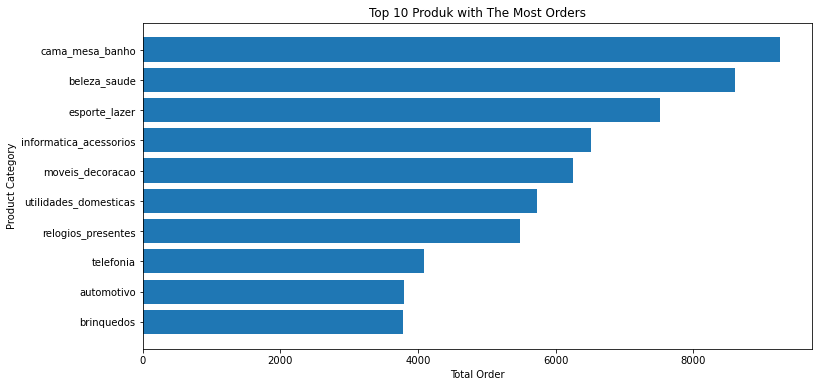

In [23]:
#Create visualization
plt.figure(figsize=(12, 6))
plt.barh(ecommerce_product['product_category_name'], ecommerce_product['order_id'])
plt.xlabel('Total Order')
plt.ylabel('Product Category')
plt.title('Top 10 Produk with The Most Orders')
plt.gca().invert_yaxis()

Berdasarkan pada chart diatas, produk "cama_mesa_banho" merupakan produk yang memiliki total pesanan terbanyak diikuti dengan produk "beleza_saude" urutan kedua dan "esporte_lazer" pada urutan ketiga. Sedangkan produk yang berada pada urutan ke-10 adalah produk "brinquedos".

#### 2. Kota mana yang banyak melakukan pemesanan produk?

Pada pertanyaan bisnis ini kita akan mengidentifikasi kota dengan total pesanan terbanyak, namun kita akan membatasi kota yang akan kita identifikasi hanya 10 kota teratas yang melakukan pesanan terbanyak. Kita akan membuat sebuah DataFrame baru dengan nama `ecommerce_city` untuk menampung informasi terkait total pesanan produk berdasarkan kota.

In [24]:
ecommerce_city = ecommerce.groupby(by='customer_city').order_id.nunique().sort_values(ascending=False).reset_index().head(10)
ecommerce_city

,customer_city,order_id
0,sao paulo,14779
1,rio de janeiro,6468
2,belo horizonte,2640
3,brasilia,2036
4,curitiba,1468
5,campinas,1385
6,porto alegre,1321
7,salvador,1170
8,guarulhos,1127
9,sao bernardo do campo,891


Berdasarkan data diatas kita telah mendapatkan 10 kota teratas berserta dengan total pesanannya. Untuk mempermudah dalam memahami data kita akan membuat data visualisasi menggunakan bar chart yang akan menampilkan 10 kota yang melakukan pesanan terbanyak berurutan dari yang paling banyak hingga yang paling sedikit.

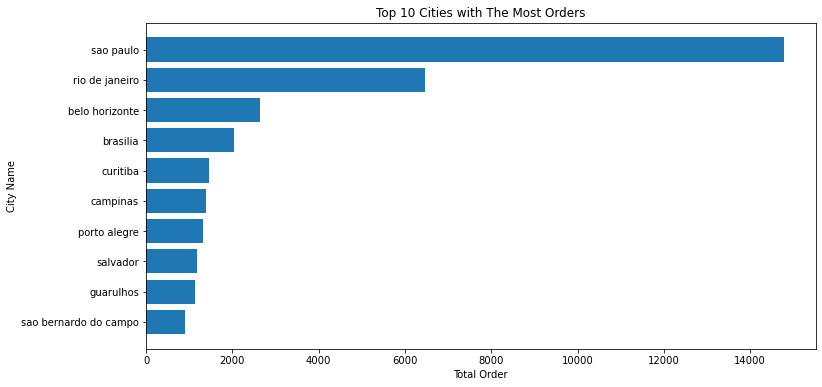

In [25]:
#Create visualization
plt.figure(figsize=(12, 6))
plt.barh(ecommerce_city['customer_city'], ecommerce_city['order_id'])
plt.xlabel('Total Order')
plt.ylabel('City Name')
plt.title('Top 10 Cities with The Most Orders')
plt.gca().invert_yaxis()

Berdasarkan pada bar chart diatas, kota "sao paulo" merupakan kota yang melakukan pesanan terbanyak diikuti dengan kota "rio de janeiro" urutan kedua dan "belo horizonte" pada urutan ketiga. Sedangkan kota yang berada pada urutan ke-10 adalah kota "sao bernardo do campo".

#### 3. Bagaimana performa total pemesanan produk per bulan?

Pada pertanyaan bisnis ketiga, kita ingin mengetahui informasi terkait bagaimana performa total pemesanan produk per bulan yang dimulai dari bulan January tahun 2017 hingga bulan Agustus tahun 2018. Kita akan membuat sebuah DataFrame baru dengan nama `order_by_month` untuk menampung informasi terkait performa total pesanan produk per bulan.

In [26]:
order_by_month = ecommerce.groupby('purchase_month_year').order_id.nunique().reset_index()
order_by_month = order_by_month.sort_values('purchase_month_year')
order_by_month

,purchase_month_year,order_id
0,2017-01-01,737
1,2017-02-01,1592
2,2017-03-01,2496
3,2017-04-01,2243
4,2017-05-01,3466
5,2017-06-01,3085
6,2017-07-01,3824
7,2017-08-01,4129
8,2017-09-01,4090
9,2017-10-01,4428


Berdasarkan data diatas kita telah mendapatkan total pesanan yang diurutkan berdasarkan bulan Januari 2017 hingga bulan Agustus 2018. Untuk mempermudah dalam memahami data kita akan membuat data visualisasi menggunakan line chart.

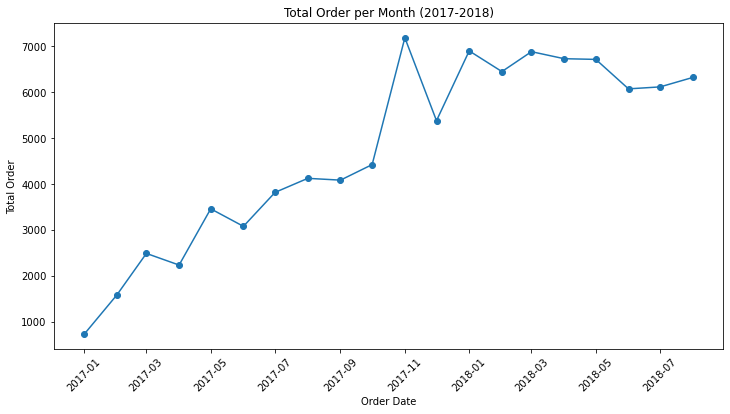

In [27]:
#Create Visualization
plt.figure(figsize=(12, 6))
plt.plot(order_by_month['purchase_month_year'], order_by_month['order_id'], marker='o')
plt.xlabel('Order Date')
plt.ylabel('Total Order')
plt.title('Total Order per Month (2017-2018)')
plt.xticks(rotation=45)
plt.show()

Berdasarkan pada line chart diatas, bulan Januari tahun 2017 merupakan bulan yang memiliki total pesanan paling rendah dengan total pesanan kurang dari seribu pesanan. Sedangkan total pesanan terbanyak terjadi pada bulan November tahun 2017 dengan total pesanan lebih dari tujuh ribu pesanan. Selain itu berdasarkan chart diperoleh hasil bahwa pada tahun 2018 total pesanan memiliki jumlah lebih dari enam ribu pesanan.

#### 4. Bagaimana performa pendapatan per bulan?

Selanjutnya, kita ingin mengetahui informasi terkait bagaimana performa pendapatan dari total penjualan produk per bulan yang dimulai dari bulan January tahun 2017 hingga bulan Agustus tahun 2018. Kita akan membuat sebuah DataFrame baru dengan nama `revenue_by_month` untuk menampung informasi terkait performa total pendapatan dari penjualan produk per bulan.

In [28]:
revenue_by_month = ecommerce.groupby('purchase_month_year').price.sum().reset_index()
revenue_by_month = revenue_by_month.sort_values('purchase_month_year')
revenue_by_month

,purchase_month_year,price
0,2017-01-01,108174.83
1,2017-02-01,224167.74
2,2017-03-01,352741.68
3,2017-04-01,332221.49
4,2017-05-01,478340.91
5,2017-06-01,417020.97
6,2017-07-01,478636.66
7,2017-08-01,549731.25
8,2017-09-01,601446.52
9,2017-10-01,631926.38


Berdasarkan data diatas kita telah mendapatkan total pendapatan yang diurutkan berdasarkan bulan Januari 2017 hingga bulan Agustus 2018. Untuk mempermudah dalam memahami data kita akan membuat data visualisasi menggunakan line chart.

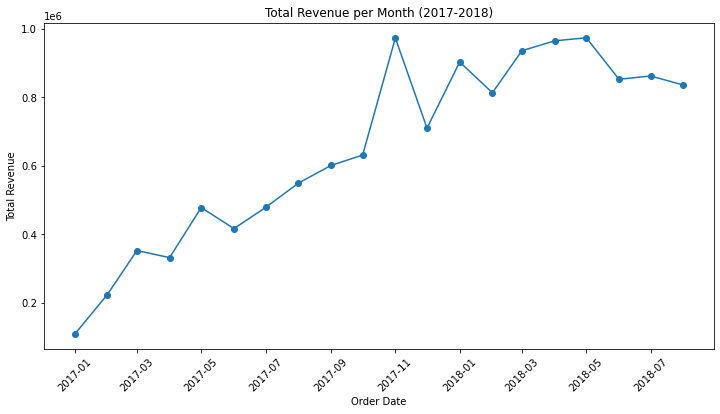

In [29]:
#Create Visualization
plt.figure(figsize=(12, 6))
plt.plot(revenue_by_month['purchase_month_year'], revenue_by_month['price'], marker='o')
plt.xlabel('Order Date')
plt.ylabel('Total Revenue')
plt.title('Total Revenue per Month (2017-2018)')
plt.xticks(rotation=45)
plt.show()

Berdasarkan pada line chart diatas, bulan Januari tahun 2017 merupakan bulan yang memiliki total pendapatan paling rendah. Sedangkan total pendapatan terbanyak terjadi pada bulan November tahun 2017. Selain itu berdasarkan chart diperoleh hasil bahwa pada 3 bulan terakhir yaitu pada bulan Juni hingga Agustus tahun 2018 total pendapatan mengalami penurunan.

#### 5. Bagaimana distribusi pelanggan berdasarkan recency, frequency dan monetary?

Untuk menjawab pertanyaan ini kita akan menggunakan teknik analisis yang lebih dalam yaitu RFM analysis.

#### RFM Analysis

RFM (Recency, Frequency, Monetary) analisis adalah sebuah metode analisis yang  biasa digunakan untuk mengidentifikasi pelanggan dengan cara melakukan pengelompokkan atu segmentasi. 

Analisis RFM secara objektif mengevaluasi dan mengelompokkan pelanggan berdasarkan Recency, Frequency dan Monetary dari data transaksi yang ada. Segmentasi ini memungkinkan perusahaan untuk menentukan pelanggan mereka yang memiliki high value dan low value yang akan digunakan untuk menyesuaikan strategi bisnis yang akan diterapkan.

- Recency: parameter yang digunakan untuk melihat kapan terakhir seorang pelanggan melakukan transaksi.
- Frequency: parameter ini digunakan untuk mengidentifikasi seberapa sering seorang pelanggan melakukan transaksi.
- Monetary: parameter terakhir ini digunakan untuk mengidentifikasi seberapa besar revenue yang berasal dari pelanggan tersebut.

Untuk melakukan RFM analysis, kita perlu membuat sebuah DataFrame untuk menampung informasi terkait tiga parameter tersebut.

In [30]:
#Calculating RFM Metrics
rfm = ecommerce.groupby(by='customer_id', as_index=False).agg({
    'order_purchase_timestamp': 'max', #calculates the maximum (most recent) purchase
    'order_id': 'count', #calculates the count of orders
    'price': 'sum' #calculates the sum of prices
})

#Renaming Columns
rfm.columns = ['customer_id', 'max_order_timestamp', 'frequency', 'monetary']
 
#Converting Timestamp to Date
rfm['max_order_timestamp'] = rfm['max_order_timestamp'].dt.date

#Calculating Recency
recent_date = ecommerce['order_purchase_timestamp'].dt.date.max()
rfm['recency'] = rfm['max_order_timestamp'].apply(lambda x: (recent_date - x).days)
 
rfm.drop(columns='max_order_timestamp', inplace=True)
rfm.head()


,customer_id,frequency,monetary,recency
0,00012a2ce6f8dcda20d059ce98491703,1,89.80,288
1,000161a058600d5901f007fab4c27140,1,54.90,409
2,0001fd6190edaaf884bcaf3d49edf079,1,179.99,547
3,0002414f95344307404f0ace7a26f1d5,1,149.90,378
4,000379cdec625522490c315e70c7a9fb,1,93.00,149


Berdasarkan data di atas kita telah mendapatkan hasil kapan transaksi terakhir, berapa kali melakukan transaksi dan berapa revenue yang bearsal dari setiap customer. Kemudian untuk mempermudah dalam memahami data kita akan membuat data visualisasi menggunakan library Seaborn yaitu plot histogram. 

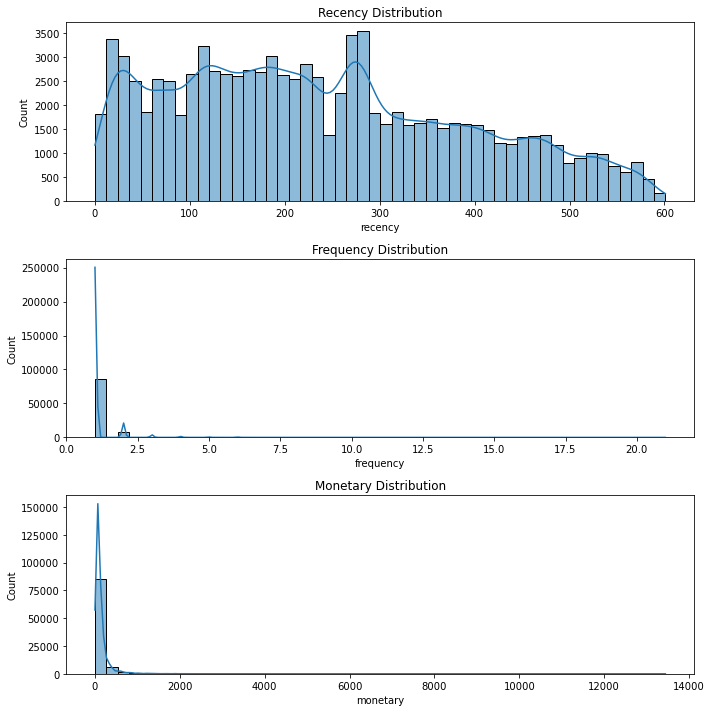

In [31]:
#Create Visualization
f, axes = plt.subplots(3, 1, figsize=(10, 10))

#Plotting histograms
sns.histplot(rfm['recency'], bins=50, ax=axes[0], kde=True).set_title('Recency Distribution')
sns.histplot(rfm['frequency'], bins=50, ax=axes[1], kde=True).set_title('Frequency Distribution')
sns.histplot(rfm['monetary'], bins=50, ax=axes[2], kde=True).set_title('Monetary Distribution')

plt.tight_layout()
plt.show()

Visualisasi yang dihasilkan terdiri dari tiga histogram, setiap histogram menampilkan distribusi data dari hasil analisis RFM yang telah dilakukan. Histogram ini memungkinkan kita untuk memahami penyebaran data berdasarkan Recency, Frequency dan Monetary. 

Berdasarkan histogram di atas dapat kita simpulkan bahwa:

**Recency**
- Distribusi jumlah customer yang melakukan transaksi beberapa hari terakhir (<300 hari) mengalami peningkatan jumlah pelanggan. 

**Frequency**
- Sebagian besar customer memiliki frekuensi rendah, hal ini mungkin menunjukkan adanya sejumlah besar customer yang hanya melakukan transaksi/pembelian hanya satu kali.

**Monetary**
- Distribusi customer yang melakukan transaksi menunjukkan bahwa customer hanya menghabiskan jumlah uang yang sedikit, sehingga memberikan pendapatan yang rendah bagi perusahaan.

#### Mengurutkan customer berdasarkan recency, frequency, & monetary score

Pada tahap ini kita akan mengurutkan customer berdasarkan dengan score recency, frequency, & monetary customer. Peringkat ini berguna untuk mensegmentasi pelanggan berdasarkan skor RFM mereka dan mengidentifikasi segmen pelanggan yang berbeda untuk strategi pemasaran yang ditargetkan.


Kita akan menghitung score dari nilai tiap parameter menggunakan function `.rank` dan membuat dataframe untuk menyimpan hasilnya.

In [32]:
rfm['r_rank'] = rfm['recency'].rank(ascending=False)
rfm['f_rank'] = rfm['frequency'].rank(ascending=True)
rfm['m_rank'] = rfm['monetary'].rank(ascending=True)

rfm.head()

,customer_id,frequency,monetary,recency,r_rank,f_rank,m_rank
0,00012a2ce6f8dcda20d059ce98491703,1,89.80,288,32128.0,42699.5,48659.0
1,000161a058600d5901f007fab4c27140,1,54.90,409,15443.5,42699.5,30119.0
2,0001fd6190edaaf884bcaf3d49edf079,1,179.99,547,2303.5,42699.5,77109.5
3,0002414f95344307404f0ace7a26f1d5,1,149.90,378,19560.5,42699.5,70956.0
4,000379cdec625522490c315e70c7a9fb,1,93.00,149,63228.5,42699.5,51029.5


Berdasarkan data di atas hasil yang didapatkan memiliki nilai yang besar yaitu ribuan, maka dari itu kita akan melakukan normalisasi. Normalisasi adalah proses menskalakan nilai suatu variabel ke kisaran standar, biasanya antara 0 dan 100.

In [33]:
# normalizing the rank of the customers
rfm['r_rank_norm'] = (rfm['r_rank']/rfm['r_rank'].max())*100
rfm['f_rank_norm'] = (rfm['f_rank']/rfm['f_rank'].max())*100
rfm['m_rank_norm'] = (rfm['m_rank']/rfm['m_rank'].max())*100
 
rfm.drop(columns=['r_rank', 'f_rank', 'm_rank'], inplace=True)
 
rfm.head()

,customer_id,frequency,monetary,recency,r_rank_norm,f_rank_norm,m_rank_norm
0,00012a2ce6f8dcda20d059ce98491703,1,89.80,288,33.871002,45.013652,51.296134
1,000161a058600d5901f007fab4c27140,1,54.90,409,16.281338,45.013652,31.751336
2,0001fd6190edaaf884bcaf3d49edf079,1,179.99,547,2.428469,45.013652,81.288544
3,0002414f95344307404f0ace7a26f1d5,1,149.90,378,20.621692,45.013652,74.801548
4,000379cdec625522490c315e70c7a9fb,1,93.00,149,66.658760,45.013652,53.795106


Selanjutnya kita akan menghitung skor RFM (Recency, Frequency, Monetary) untuk setiap pelanggan berdasarkan nilai peringkat yang dinormalisasi untuk Recency, Frequency, Monetary.

In [34]:
rfm['RFM_score'] = 0.15*rfm['r_rank_norm']+0.28 * \
    rfm['f_rank_norm']+0.57*rfm['m_rank_norm']
rfm['RFM_score'] *= 0.05
rfm = rfm.round(2)
rfm[['customer_id', 'RFM_score']].head(7)

,customer_id,RFM_score
0,00012a2ce6f8dcda20d059ce98491703,2.35
1,000161a058600d5901f007fab4c27140,1.66
2,0001fd6190edaaf884bcaf3d49edf079,2.97
3,0002414f95344307404f0ace7a26f1d5,2.92
4,000379cdec625522490c315e70c7a9fb,2.66
5,0004164d20a9e969af783496f3408652,1.74
6,000419c5494106c306a97b5635748086,1.55


Kode dia atas melakukan analisis RFM dengan memberikan bobot pada peringkat Recency, Frequency, Monetary yang dinormalisasi, menghitung skor RFM keseluruhan untuk setiap pelanggan, menskalakan skor, dan membulatkannya ke dua desimal. Skor RFM adalah metrik gabungan yang membantu dalam mensegmentasi pelanggan berdasarkan perilaku dan nilai mereka terhadap bisnis.

#### Segmentasi customer berdasarkan RFM score

Selanjutnya kita akan membuat kolom baru bernama "customer_segment" berdasarkan skor RFM (Recency, Frequency, Monetary) yang telah dihitung. Kolom "customer_segment" dirancang untuk mengkategorikan customer ke dalam segmen atau grup berbeda berdasarkan skor RFM mereka. Customer akan dibagi menjadi 5 segmen yaitu Top Customers, High Value Customers, Medium Value Customers, Low Value Customers, dan Lost Customer. Untuk mempermudah melakukan kategori customer kita akan menggunakan library numpy.

In [35]:
import numpy as np

In [36]:
rfm["customer_segment"] = np.where(
    rfm['RFM_score'] > 4.5, "Top customers", (np.where(
        rfm['RFM_score'] > 4, "High value customer",(np.where(
            rfm['RFM_score'] > 3, "Medium value customer", np.where(
                rfm['RFM_score'] > 1.6, 'Low value customers', 'Lost customers'))))))

rfm[['customer_id', 'RFM_score', 'customer_segment']].head(20)
     

,customer_id,RFM_score,customer_segment
0,00012a2ce6f8dcda20d059ce98491703,2.35,Low value customers
1,000161a058600d5901f007fab4c27140,1.66,Low value customers
2,0001fd6190edaaf884bcaf3d49edf079,2.97,Low value customers
3,0002414f95344307404f0ace7a26f1d5,2.92,Low value customers
4,000379cdec625522490c315e70c7a9fb,2.66,Low value customers
5,0004164d20a9e969af783496f3408652,1.74,Low value customers
6,000419c5494106c306a97b5635748086,1.55,Lost customers
7,00046a560d407e99b969756e0b10f282,2.86,Low value customers
8,00050bf6e01e69d5c0fd612f1bcfb69c,2.04,Low value customers
9,000598caf2ef4117407665ac33275130,4.18,High value customer


Setelah menentukan dan mendapatkan data customer dari setiap segmen, selanjutnya kita akan menghitung jumlah customer berdasarkan segmen yang sudah dibuat.

In [37]:
cs_segment = rfm.groupby(by="customer_segment", as_index=False).customer_id.nunique()
cs_segment

,customer_segment,customer_id
0,High value customer,3452
1,Lost customers,19065
2,Low value customers,44650
3,Medium value customer,26868
4,Top customers,824


Berdasarkan data diatas kita telah mendapatkan jumlah customer berdasarkan segmennya.Untuk mempermudah dalam memahami data kita akan membuat data visualisasi menggunakan bar chart yang akan menampilkan jumlah customer berdasarkan segmennya.

In [38]:
cs_segment['customer_segment'] = pd.Categorical(cs_segment['customer_segment'], [
    "Lost customers", "Low value customers", "Medium value customer",
    "High value customer", "Top customers"
])

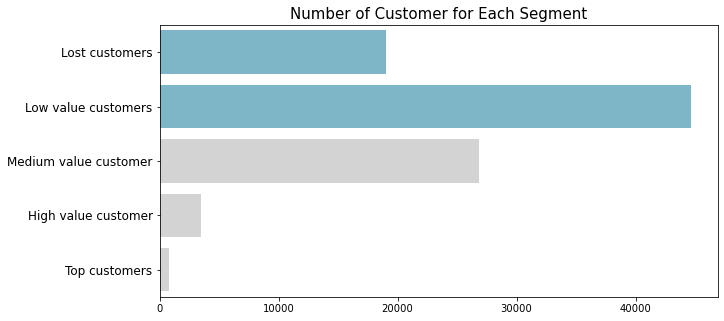

In [39]:
#Create Visualization
plt.figure(figsize=(10, 5))
colors_ = ["#72BCD4", "#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(
    x="customer_id", 
    y="customer_segment",
    data=cs_segment.sort_values(by="customer_segment", ascending=False),
    palette=colors_
)
plt.title("Number of Customer for Each Segment", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

Berdasarkan pada bar chart diatas, diperoleh hasil bahwa jumlah customer yang masuk dalam kategori atau segmen "Low value customers" memiliki jumlah yang paling banyak yaitu lebih dari 40,000 customer. Sedangkan jumlah customer yang masuk dalam kategori atau segmen "Top customer" memiliki jumlah customer yang paling sedikit yaitu kurang dari 1000 customer.

# F. Conclusion

**1. Produk yang memiliki total pesanan terbanyak**

Dari total 73 produk yang dijual melalui ecommerce, produk "cama_mesa_banho" merupakan produk yang memiliki total pesanan terbanyak yaitu sebanyak 9266 total pesanan. Sedangkan produk yang berada pada urutan ke-10 adalah produk "brinquedos" dengan total 3781 pesanan. Hal ini menunjukkan bahwa produk "cama_mesa_banho" merupakan produk yang paling laris yang dipesan oleh customer. Perusahaan perlu membuat strategi marketing untuk produk yang memiliki total pesanan rendah.

**2. Kota yang banyak melakukan pemesanan produk**

Dari total 4071 kota yang ada di Brazil, kota "sao paulo" merupakan kota yang melakukan pesanan terbanyak melaui ecommerce dengan total 14779 pesanan. Sedangkan kota yang berada pada urutan ke-10 adalah kota "sao bernardo do campo" dengan total 891. Perbedaan total pesanan pada beberapa kota tersebut sangat signifikan antara satu dengan yang lain. Kota "sao paulo" memiliki banyak customer yang melakukan belanja online. Perusahaan bisa menargetkan strategi bisnis dan marketing yang sesuai terhadap 10 kota yang melakukan pesanan terbanyak untuk meningkatkan pendapatan.

**3. Performa total pemesanan produk per bulan**

Bulan Januari tahun 2017 merupakan bulan yang memiliki total pesanan paling rendah dengan total pesanan sebanyak 737 pesanan. Sedangkan total pesanan terbanyak terjadi pada bulan November tahun 2017 dengan total pesanan 7186. Hal ini bisa disebabkan oleh adanya suatu event tertentu yang terjadi pada bulan November yang menyebabkan meningkatnya totap pesanan. Selain itu diperoleh hasil bahwa pada tahun 2018 total pesanan mengalami sedikit penurunan dari bulan November 2017 dengan total pesanan berada dikisaran enam ribu pesanan. Perusahaan perlu membuat strategi marketing untuk mencegah terjadinya penurunan.

**4. Performa pendapatan per bulan**

Bulan Januari tahun 2017 merupakan bulan yang memiliki total pendapatan paling rendah. Sedangkan total pendapatan terbanyak terjadi pada bulan November tahun 2017. Selain itu diperoleh hasil bahwa pada 3 bulan terakhir yaitu pada bulan Juni hingga Agustus tahun 2018 total pendapatan mengalami penurunan. Data yang dimiliki pada tahun 2018 tidak memberikan hasil pendapatan keseluruhan hingga akhir tahun. Namun untuk mencegah adanya resiko mengalami penurunan, perusahaan perlu membuat strategi marketing untuk mencegah hal tersebut.

**5. Distribusi pelanggan berdasarkan recency, frequency dan monetary**

**Recency**

Distribusi jumlah customer yang melakukan transaksi beberapa hari terakhir mengalami peningkatan jumlah pelanggan hal ini menunjukkan penggunaan ecommerce mulai diminati sebagai platform jual beli secara online.

**Frequency**

Sebagian besar customer memiliki frekuensi rendah, hal ini mungkin menunjukkan adanya sejumlah besar customer yang hanya melakukan transaksi/pembelian hanya satu kali. Perusahaan mungkin bisa meningkatkab beberapa aspek untuk meningkat kan frequensi pembelian seperti mengidentifikasi customer behavior.

**Monetary**

Distribusi customer yang melakukan transaksi menunjukkan bahwa customer hanya menghabiskan jumlah uang yang sedikit, sehingga memberikan pendapatan yang rendah bagi perusahaan.

**Segmentasi customer berdasarkan RFM score**

Segmentasi customer dibagi menjadi 5 segmen atau kategori yaitu: Top Customers, High Value Customers, Medium Value Customers, Low Value Customers, dan Lost Customer. Segmen "Top customer" merupakan segmen yang memiliki jumlah customer yang paling sedikit yaitu sebanyak 824 customer. Segmen "High value customers" memiliki jumlah customer sebanyak 3452 customer. Segmen "Medium value customer" memiliki jumlah customer sebanyak	26868 customer. Segmen "Low value customers" merupakan segmen yang memiliki jumlah customer terbanyak yaitu 44650 customer. Sedangkan yang terakhir yaitu segmen "Lost customers" memiliki jumlah customer sebanyak 19065 customer.

### Recommendations

Beberapa rekomendasi srategi yang mungkin bisa dilakukan perusahaan untuk meningkatkan jumlah customer dan pendapatan.

1. Meningkatkan UI/UX ecommerce yang yang bisa digunakan dengan mudah.
2. Melakukan penelitian untuk mengidentifikasi perilaku pelanggan berdasarkan kota. Sesuaikan strategi berdasarkan perilaku pelanggan yang ada di kota tersebut.
3. Optimalkan logistik dan pengiriman. Fokus pada pengurangan waktu pengiriman, penurunan biaya pengiriman, dan temukan cara untuk membuat proses lebih nyaman, terutama bagi pelanggan yang tinggal jauh.
4. Tawarkan diskon, cashback, atau turunkan harga, untuk meningkatkan loyalitas keterlibatan pelanggan.
5. Meningkatkan kualitas layanan dan mengatasi masalah layanan pelanggan dengan segera di semua tingkat kepuasan dan keluhan.

In [40]:
#ecommerce.to_csv('ecommerce.csv', index=False)